<a href="https://colab.research.google.com/github/peddojiharshitha/CODSOFT/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES PREDICTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
df=pd.read_csv("/content/drive/MyDrive/SALES PREDICTION USING PYTHON/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **Data Inspection**

In [9]:
df.shape

(200, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

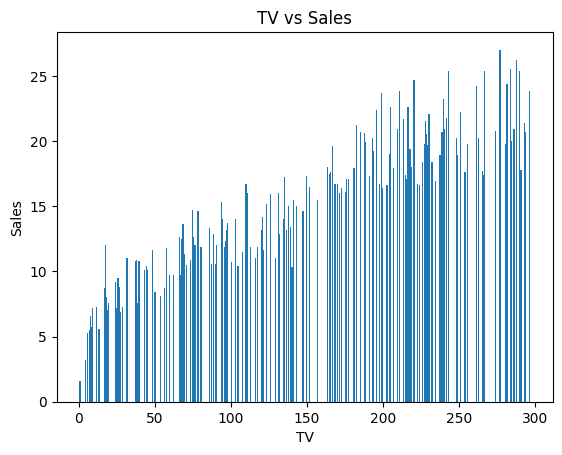

In [14]:
#visualize data
x1=df["TV"]
y1=df["Sales"]
plt.bar(x1,y1)
plt.title("TV vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

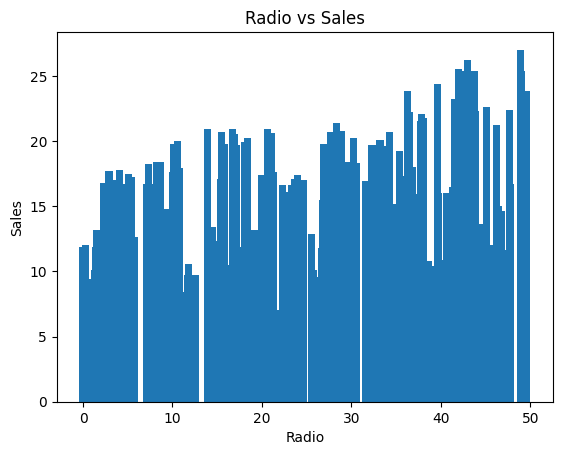

In [15]:
x2=df["Radio"]
y1=df["Sales"]
plt.bar(x2,y1)
plt.title("Radio vs Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()


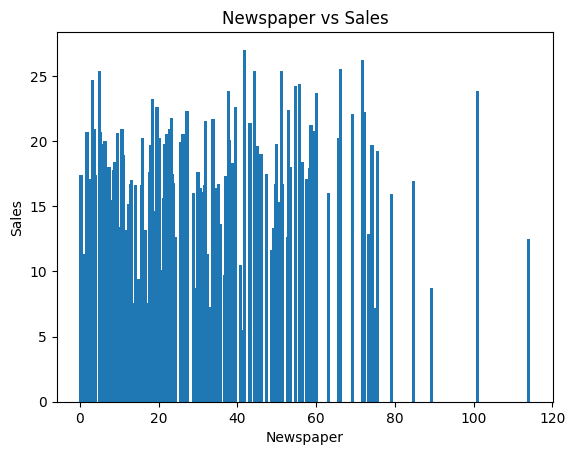

In [16]:
x3=df["Newspaper"]
y1=df["Sales"]
plt.bar(x3,y1)
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [17]:
x=df.drop("Sales",axis=1)
y=df["Sales"]

In [18]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

# **Data Cleaning**

In [21]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

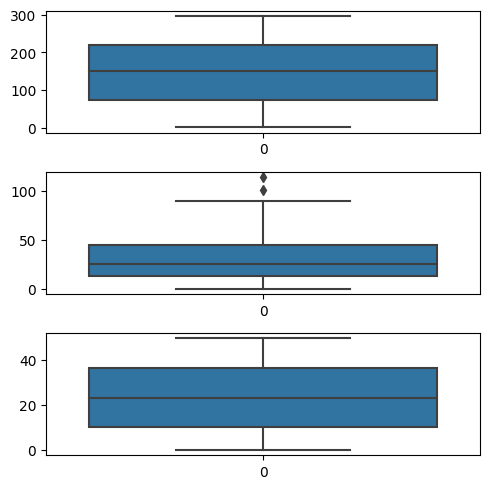

In [25]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [26]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=5)

lr=LinearRegression()
lr.fit(x_train, y_train)

lr.score(x_test,y_test)

0.9217965732000767

In [30]:
##### let's Make Prediction
y_pred=lr.predict(x_test)
y_pred

array([ 7.35733388, 14.2536813 , 10.92688281,  9.77848644, 17.20480046,
       12.1584952 , 17.25070443, 11.21334523, 21.19062267, 12.16812081,
       21.88514846, 10.06314351, 18.26645925, 18.12481594, 20.72897735,
       21.36941536, 17.26635961, 21.13922615,  8.92825499, 10.64655522,
       13.55283459, 15.57615694, 22.14148305, 17.88067856, 19.49564162,
       22.24780557, 17.26851961, 24.26941727,  7.93520677, 20.8891312 ,
       19.51190328, 14.31910304, 23.74541301, 18.96969139, 15.97144734,
       11.18079295,  7.12049612, 13.79754713, 20.25096133,  9.37661925])

In [31]:
df2=pd.DataFrame({
    "Actual":y_test,
    "Preddicted":y_pred
})
df2

,Actual,Preddicted
119,6.6,7.357334
77,14.2,14.253681
148,10.9,10.926883
149,10.1,9.778486
154,20.6,17.204800
151,11.6,12.158495
122,16.6,17.250704
6,11.8,11.213345
28,18.9,21.190623
71,12.4,12.168121


In [32]:
lr.coef_

array([ 0.05525923,  0.10426071, -0.0007877 ])

In [33]:
lr.intercept_

4.634699076735965

In [34]:
import math
def prediction_function(TV):
    z = 0.10426071 * TV + 4.634699076735965
    return z


In [35]:
tv=44
prediction_function(tv)

9.222170316735966

# **Exploratory Data Analysis**

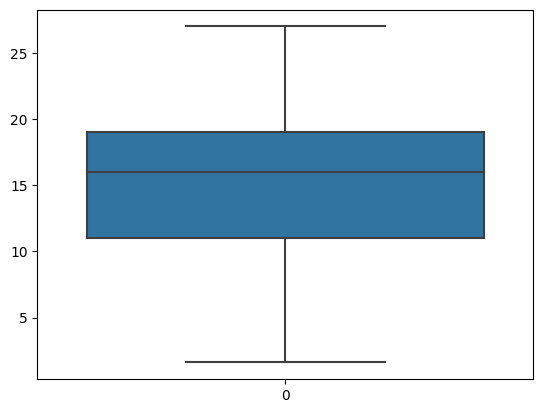

In [37]:
sns.boxplot(df['Sales'])
plt.show()

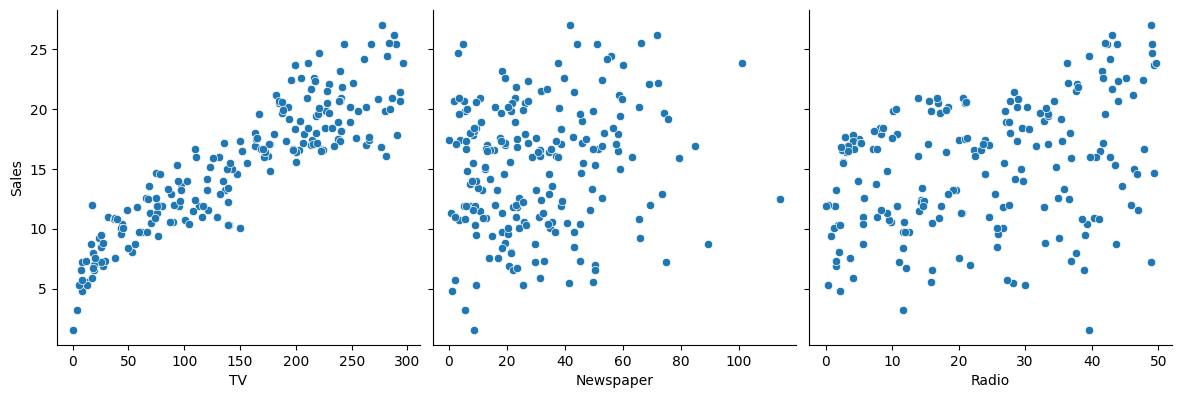

In [39]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

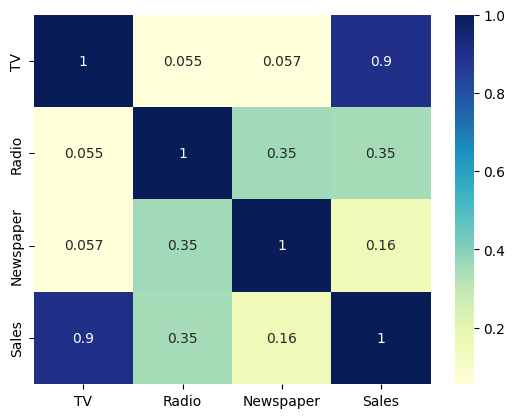

In [41]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()
